In [44]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import numpy as np

In [2]:
folder_path = '/Users/alina/Desktop/AFM/simulation_data' # /Users/alina/Desktop/AFM/simulation_data
file_str1 = 'gLongRun.csv'
file_str2 = 'eLongRun.csv'

gLongRun = pd.read_csv(os.path.join(folder_path, file_str1))
eLongRun = pd.read_csv(os.path.join(folder_path, file_str2))

In [3]:
gLongRun_data = gLongRun.iloc[18:,1:]

In [4]:
eLongRun_data = eLongRun.iloc[19:,1:]

In [5]:
eLongRun_data.columns = eLongRun_data.iloc[0,:].to_list()

In [6]:
eLongRun_main = eLongRun_data.reset_index(drop=True).drop(0,axis=0).apply(pd.to_numeric, errors='coerce')
eLongRun_main

,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.103813,0.103813,0.000000,-0.095971,0.095971,0.000000,0.110675,0.110675,0.000000,-0.083031,0.083031,0.000000,-0.088325,0.088325
3,0.103813,0.149495,0.149495,-0.095971,0.021076,0.021076,0.110675,0.128125,0.128125,-0.083031,0.055779,0.055779,-0.088325,-0.155181,0.155181
4,0.253308,0.202431,0.202431,-0.074895,0.088325,0.088325,0.238800,0.173218,0.173218,-0.027252,-0.079502,0.079502,-0.243506,-0.012842,0.012842
5,0.455740,0.058328,0.058328,0.013430,0.154593,0.154593,0.412018,0.023233,0.023233,-0.106754,0.046760,0.046760,-0.256347,0.105578,0.105578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,0.751593,-0.084992,0.084992,0.339084,-0.140476,0.140476,1.516224,0.127537,0.127537,2.899030,-0.100676,0.100676,-3.908734,0.092834,0.092834
1998,0.666601,-0.097736,0.097736,0.198608,0.054406,0.054406,1.643760,0.113420,0.113420,2.798353,-0.107931,0.107931,-3.815900,0.095971,0.095971
1999,0.568866,-0.126948,0.126948,0.253014,0.086364,0.086364,1.757181,-0.085188,0.085188,2.690423,-0.104205,0.104205,-3.719929,0.121851,0.121851
2000,0.441917,-0.085384,0.085384,0.339378,0.091070,0.091070,1.671993,-0.102833,0.102833,2.586217,0.073424,0.073424,-3.598079,-0.090089,0.090089


In [91]:
#eLongRun_main.to_pickle('/Users/alina/Desktop/AFM/simulation_data/eLongRun.pkl')

In [11]:
eLogPrice = eLongRun_main.loc[:,[c.startswith('log-price') for c in eLongRun_main.columns ]]
eReturns = eLongRun_main.loc[:,[c.startswith('returns') for c in eLongRun_main.columns ]]
eVol = eLongRun_main.loc[:,[c.startswith('volatility') for c in eLongRun_main.columns ]]
eVol

,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.103813,0.095971,0.110675,0.083031,0.088325
3,0.149495,0.021076,0.128125,0.055779,0.155181
4,0.202431,0.088325,0.173218,0.079502,0.012842
5,0.058328,0.154593,0.023233,0.046760,0.105578
...,...,...,...,...,...
1997,0.084992,0.140476,0.127537,0.100676,0.092834
1998,0.097736,0.054406,0.113420,0.107931,0.095971
1999,0.126948,0.086364,0.085188,0.104205,0.121851
2000,0.085384,0.091070,0.102833,0.073424,0.090089


In [62]:
# calculate mean and std across ticks
elPriceMean = eLogPrice.mean(axis=1)
ereturnsMean = eReturns.mean(axis=1)
eVolMean = eVol.mean(axis=1)

elPriceStd = eLogPrice.std(axis=1)
returnsStd = eReturns.std(axis=1)
eVolStd = eVol.std(axis=1)

In [63]:
eVolMean

1       0.000000
2       0.096363
3       0.101931
4       0.111264
5       0.077698
          ...   
1997    0.109303
1998    0.093893
1999    0.104911
2000    0.088560
2001    0.106205
Length: 2001, dtype: float64

In [14]:
gLongRun_data = gLongRun_data.reset_index(drop=True)
gLongRun_data.columns = gLongRun_data.iloc[0,:].to_list()
gLongRun_data

,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator
0,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.073032056,0.073032056,0,-0.103029115,0.103029115,0,-0.09675522,0.09675522,0,-0.118909911,0.118909911,0,-0.118517792,0.118517792
3,0.073032056,-0.052641898,0.052641898,-0.103029115,-0.141064602,0.141064602,-0.09675522,0.042054701,0.042054701,-0.118909911,0.04715224,0.04715224,-0.118517792,-0.179688266,0.179688266
4,0.020390158,-0.110479365,0.110479365,-0.244093716,-0.011273405,0.011273405,-0.05470052,-0.085187727,0.085187727,-0.071757671,-0.087736496,0.087736496,-0.298206058,-0.030683266,0.030683266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,3.58072738,0.014606411,0.014606411,10.03029115,-0.060876385,0.060876385,-3.994804431,0.093226154,0.093226154,-22.73002647,0.028526615,0.028526615,-2.024213312,0.040878345,0.040878345
1998,3.595333791,-0.09675522,0.09675522,9.969414763,0.085383786,0.085383786,-3.901578277,0.170473483,0.170473483,-22.70149985,-0.089893148,0.089893148,-1.983334967,0.109499069,0.109499069
1999,3.498578571,-0.148122733,0.148122733,10.05479855,0.156945398,0.156945398,-3.731104794,0.248897167,0.248897167,-22.791393,0.041662582,0.041662582,-1.873835898,0.172826194,0.172826194
2000,3.350455838,-0.009312812,0.009312812,10.21174395,0.209097147,0.209097147,-3.482207627,0.142437016,0.142437016,-22.74973042,0.105381825,0.105381825,-1.701009705,0.244779924,0.244779924


In [15]:
gLongRun_main = gLongRun_data.drop(0,axis=0)

In [94]:
#gLongRun_main.to_pickle('/Users/alina/Desktop/AFM/simulation_data/gLongRun.pkl')

In [16]:
gLongRun_main = gLongRun_main.apply(pd.to_numeric, errors='coerce')
gLongRun_main

,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator,log-price,returns,volatility-indicator
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.073032,0.073032,0.000000,-0.103029,0.103029,0.000000,-0.096755,0.096755,0.000000,-0.118910,0.118910,0.000000,-0.118518,0.118518
3,0.073032,-0.052642,0.052642,-0.103029,-0.141065,0.141065,-0.096755,0.042055,0.042055,-0.118910,0.047152,0.047152,-0.118518,-0.179688,0.179688
4,0.020390,-0.110479,0.110479,-0.244094,-0.011273,0.011273,-0.054701,-0.085188,0.085188,-0.071758,-0.087736,0.087736,-0.298206,-0.030683,0.030683
5,-0.090089,0.071071,0.071071,-0.255367,0.090873,0.090873,-0.139888,0.056759,0.056759,-0.159494,0.068915,0.068915,-0.328889,-0.105970,0.105970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,3.580727,0.014606,0.014606,10.030291,-0.060876,0.060876,-3.994804,0.093226,0.093226,-22.730026,0.028527,0.028527,-2.024213,0.040878,0.040878
1998,3.595334,-0.096755,0.096755,9.969415,0.085384,0.085384,-3.901578,0.170473,0.170473,-22.701500,-0.089893,0.089893,-1.983335,0.109499,0.109499
1999,3.498579,-0.148123,0.148123,10.054799,0.156945,0.156945,-3.731105,0.248897,0.248897,-22.791393,0.041663,0.041663,-1.873836,0.172826,0.172826
2000,3.350456,-0.009313,0.009313,10.211744,0.209097,0.209097,-3.482208,0.142437,0.142437,-22.749730,0.105382,0.105382,-1.701010,0.244780,0.244780


In [23]:
gLogPrice = gLongRun_main.loc[:,[c.startswith('log-price') for c in gLongRun_main.columns ]]
gReturns = gLongRun_main.loc[:,[c.startswith('returns') for c in gLongRun_main.columns ]]
gVol = gLongRun_main.loc[:,[c.startswith('volatility') for c in gLongRun_main.columns ]]
gVol

,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator,volatility-indicator
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.073032,0.103029,0.096755,0.118910,0.118518
3,0.052642,0.141065,0.042055,0.047152,0.179688
4,0.110479,0.011273,0.085188,0.087736,0.030683
5,0.071071,0.090873,0.056759,0.068915,0.105970
...,...,...,...,...,...
1997,0.014606,0.060876,0.093226,0.028527,0.040878
1998,0.096755,0.085384,0.170473,0.089893,0.109499
1999,0.148123,0.156945,0.248897,0.041663,0.172826
2000,0.009313,0.209097,0.142437,0.105382,0.244780


In [65]:
# find mean and std value across each tick
glPriceMean = gLogPrice.mean(axis=1)
gReturnsMean = gReturns.mean(axis=1)
gVolMean = gVol.mean(axis=1)

glPriceStd = gLogPrice.std(axis=1)
gReturnsStd = gReturns.std(axis=1)
gVolStd = gVol.std(axis=1)

In [31]:
time =  range(1, len(glPriceMean)+1)

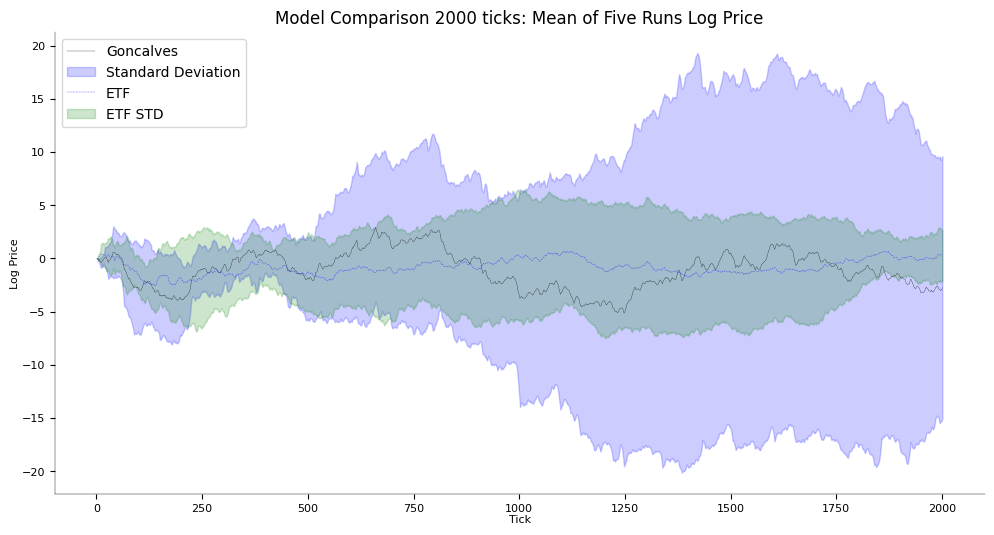

In [66]:

# Plot returns for varying max news sensitivity (mns) and max base propensity (bp) over time
plt.figure(figsize=(12, 6))

# Goncalves 2000 ticks log price
plt.plot(time, glPriceMean, label='Goncalves', color='black', linestyle='solid', linewidth=.2) #, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)
plt.fill_between(time, glPriceMean - glPriceStd, glPriceMean + glPriceStd, color='b', alpha=0.2, label='Standard Deviation')

# ETF 2000 ticks log price
plt.plot(time, elPriceMean, label='ETF', color='blue', linestyle='dashdot', linewidth=.2) #, marker='s', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='blue', markersize=3)
plt.fill_between(time, elPriceMean - elPriceStd, elPriceMean + elPriceStd, color='g', alpha=0.2, label='ETF STD')

# Adjust the border line (spine) width
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.3)  # Set spine (border) line width

# Remove specific borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# labels and title
plt.xlabel('Tick', fontsize=8, labelpad=1) # reduce padding
plt.ylabel('Log Price', fontsize=8, labelpad=1)
plt.title('Model Comparison 2000 ticks: Mean of Five Runs Log Price')
plt.legend()

# Customize tick label font size
plt.tick_params(axis='both', which='major', labelsize=8) # reduce label size

# Save the plot at 300 DPI and COMMENT OUT when not saving
#plt.savefig('/Users/alina/Desktop/AFM/figure/lPriceCompared.png', dpi=300, bbox_inches='tight')

# Display plot
plt.show()

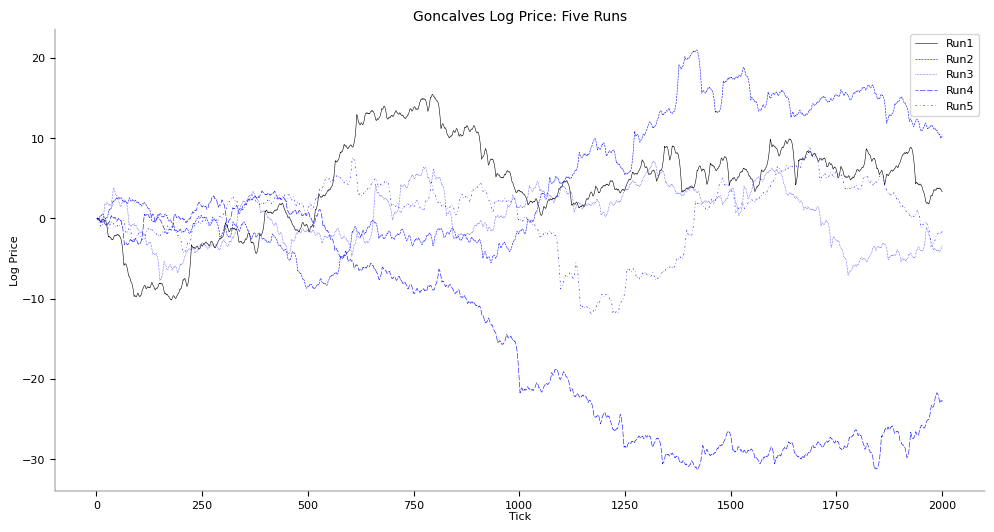

In [90]:

# Plot returns for varying max news sensitivity (mns) and max base propensity (bp) over time
plt.figure(figsize=(12, 6))

# Goncalves 2000 ticks log price
plt.plot(time, gLogPrice.iloc[:,0], label='Run1', color='black', linestyle='solid', linewidth=.4) #, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)
plt.plot(time, gLogPrice.iloc[:,1], label='Run2', color='blue', linestyle='dashed', linewidth=.4) #, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)
plt.plot(time, gLogPrice.iloc[:,2], label='Run3', color='blue', linestyle='dotted', linewidth=.4) #, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)
plt.plot(time, gLogPrice.iloc[:,3], label='Run4', color='blue', linestyle=(5, (10, 3)), linewidth=.4) #, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)
plt.plot(time, gLogPrice.iloc[:,4], label='Run5', color='blue', linestyle=(0,(3,5,1,5)), linewidth=.4) #, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)

# Adjust the border line (spine) width
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.3)  # Set spine (border) line width

# Remove specific borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# labels and title
plt.xlabel('Tick', fontsize=8, labelpad=1) # reduce padding
plt.ylabel('Log Price', fontsize=8, labelpad=1)
plt.title('Goncalves Log Price: Five Runs', fontsize=10)
plt.legend(fontsize=8)

# Customize tick label font size
plt.tick_params(axis='both', which='major', labelsize=8) # reduce label size

# Save the plot at 300 DPI and COMMENT OUT when not saving
#plt.savefig('/Users/alina/Desktop/AFM/figure/glPrice.png', dpi=300, bbox_inches='tight')

# Display plot
plt.show()

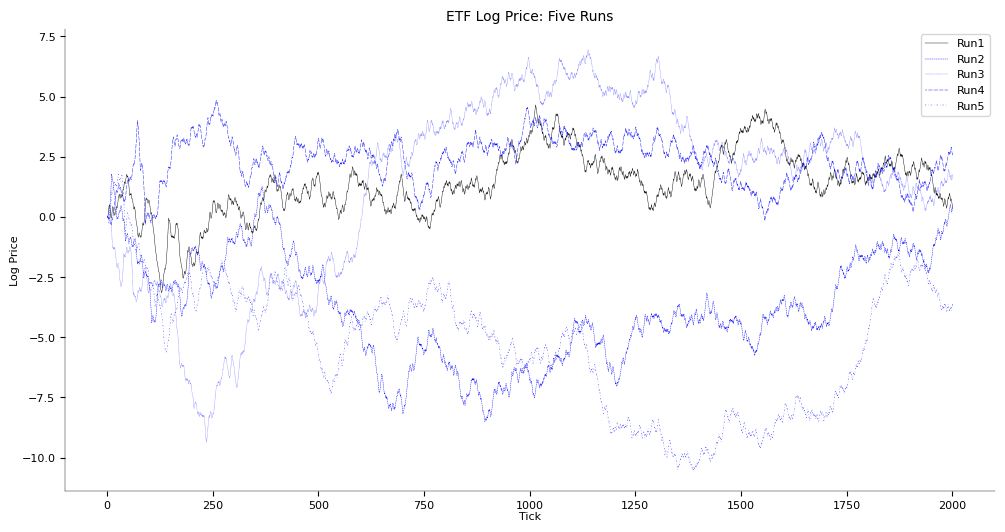

In [89]:

myLineSize = .3
# Plot returns for varying max news sensitivity (mns) and max base propensity (bp) over time
plt.figure(figsize=(12, 6))

# Goncalves 2000 ticks log price
plt.plot(time, eLogPrice.iloc[:,0], label='Run1', color='black', linestyle='solid', linewidth=myLineSize) #, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)
plt.plot(time, eLogPrice.iloc[:,1], label='Run2', color='blue', linestyle='dashed', linewidth=myLineSize) #, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)
plt.plot(time, eLogPrice.iloc[:,2], label='Run3', color='blue', linestyle='dotted', linewidth=myLineSize) #, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)
plt.plot(time, eLogPrice.iloc[:,3], label='Run4', color='blue', linestyle=(5, (10, 3)), linewidth=myLineSize) #, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)
plt.plot(time, eLogPrice.iloc[:,4], label='Run5', color='blue', linestyle=(0,(3,5,1,5)), linewidth=myLineSize) #, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)

# Adjust the border line (spine) width
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.3)  # Set spine (border) line width

# Remove specific borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# labels and title
plt.xlabel('Tick', fontsize=8, labelpad=1) # reduce padding
plt.ylabel('Log Price', fontsize=8, labelpad=1)
plt.title('ETF Log Price: Five Runs', fontsize=10)
plt.legend(fontsize=8)

# Customize tick label font size
plt.tick_params(axis='both', which='major', labelsize=8) # reduce label size

# Save the plot at 300 DPI and COMMENT OUT when not saving
#plt.savefig('/Users/alina/Desktop/AFM/figure/elPrice.png', dpi=300, bbox_inches='tight')

# Display plot
plt.show()

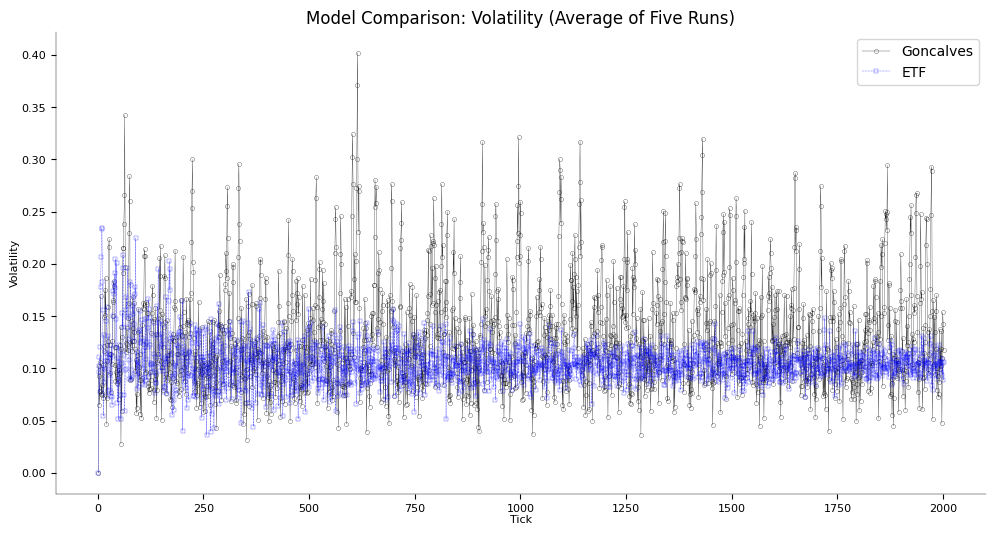

In [88]:

# Plot returns for varying max news sensitivity (mns) and max base propensity (bp) over time
plt.figure(figsize=(12, 6))

# Goncalves 2000 ticks log price
plt.plot(time, gVolMean, label='Goncalves', color='black', linestyle='solid', linewidth=.2, marker='o', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='black', markersize=3)

# ETF 2000 ticks log price
plt.plot(time, eVolMean, label='ETF', color='blue', linestyle='dashdot', linewidth=.2, marker='s', markerfacecolor='none', markeredgewidth=.2, markeredgecolor='blue', markersize=3)

# Adjust the border line (spine) width
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.3)  # Set spine (border) line width

# Remove specific borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# labels and title
plt.xlabel('Tick', fontsize=8, labelpad=1) # reduce padding
plt.ylabel('Volatility', fontsize=8, labelpad=1)
plt.title('Model Comparison: Volatility (Average of Five Runs)')
plt.legend()

# Customize tick label font size
plt.tick_params(axis='both', which='major', labelsize=8) # reduce label size

# Save the plot at 300 DPI and COMMENT OUT when not saving
#plt.savefig('/Users/alina/Desktop/AFM/figure/VolCompared.png', dpi=300, bbox_inches='tight')

# Display plot
plt.show()